In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

# **Data analytics**

In [ ]:
data = pd.read_excel("/content/gdrive/MyDrive/Reduced Features for TAI project.xlsx")
data.shape

(3562, 152)

In [ ]:
data = data.sort_values(by=['Patient ID'])
data.head()

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,1,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,1,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,...,63032.030205,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
18,2,0.920334,2.285774,0.522117,3.878066,2020.409790,1524.166434,2881.358042,463.196772,2.827840,...,17.490430,0.180535,2.530402,0.016314,0.262263,1.135335,0.909702,0.481876,20.206980,0
16,2,0.783645,2.198187,0.451967,1.929780,611.376147,481.522936,1668.899083,105.745223,0.899614,...,18.796299,0.419301,2.973633,0.001756,0.498175,1.185297,0.920319,0.910472,25.843866,0


Analyze the balance of dataset

The number of benign cases:  2020
The number of malignant cases:  1542


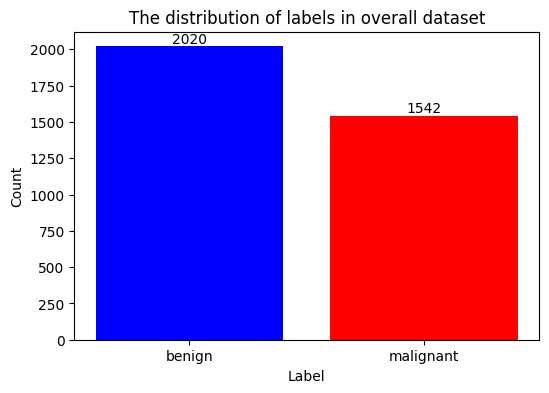

<Figure size 640x480 with 0 Axes>

In [ ]:
label_counts = data["Label"].value_counts()
benign_counts = label_counts[0]
malignant_counts = label_counts[1]
print("The number of benign cases: ", benign_counts)
print("The number of malignant cases: ", malignant_counts)
label = ["benign", "malignant"]
counts = [benign_counts, malignant_counts]
plt.figure(figsize=(6, 4))
colors = ['blue', 'red']
# Create a bar chart
plt.bar(label, counts, color = colors)
# Add labels and title
plt.xlabel("Label")
plt.ylabel('Count')
plt.title("The distribution of labels in overall dataset")
for i in range(len(label)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')
plt.show()
plt.savefig("/content/gdrive/MyDrive/TAI/label_distribution.jpg")

Analyze the distribution of the number of micros of each patient

The number of patients:  96


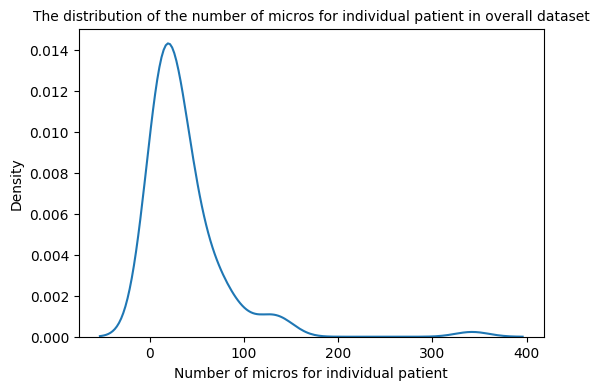

In [ ]:
# Calculate the number of patients
id = set(data["Patient ID"])
print("The number of patients: ", len(id))
num = []
# For each patient, calculate the number of micro records
for i in id:
  count = len(data[data["Patient ID"]==i])
  num.append(count)

plt.figure(figsize=(6, 4))
sns.kdeplot(num)
# plt.hist(num, bins = len(num))
plt.xlabel("Number of micros for individual patient")
# plt.ylabel('Count')
plt.title("The distribution of the number of micros for individual patient in overall dataset", fontdict= {'fontsize': 10})
plt.savefig("/content/gdrive/MyDrive/TAI/micros_distribution.jpg")
plt.show()

# **Dataset splitting**

In [ ]:
# create a dictionary, key stores the id, value stores the corresponding number of micros
# {the patient id: number of micros}
records = dict()
for i, item in enumerate(id):
  records[item] = num[i]
# sort it by value
sorted_records = dict(sorted(records.items(), key=lambda item: item[1]))
print(sorted_records)

{81: 1, 87: 1, 91: 2, 1: 3, 35: 3, 95: 3, 31: 4, 13: 5, 23: 5, 15: 7, 44: 7, 53: 7, 67: 7, 78: 7, 21: 8, 40: 8, 24: 9, 58: 9, 50: 10, 66: 10, 93: 10, 45: 11, 43: 13, 60: 13, 74: 13, 29: 14, 65: 14, 88: 14, 96: 14, 14: 15, 17: 15, 73: 15, 83: 15, 2: 16, 18: 17, 27: 17, 92: 17, 22: 18, 85: 19, 4: 20, 8: 20, 72: 20, 68: 21, 82: 21, 56: 23, 32: 24, 89: 24, 30: 25, 46: 26, 33: 27, 54: 27, 62: 27, 26: 28, 84: 29, 86: 29, 10: 30, 77: 30, 90: 30, 94: 30, 51: 31, 19: 34, 47: 34, 79: 34, 80: 34, 69: 35, 7: 36, 61: 36, 20: 38, 59: 39, 11: 40, 55: 41, 16: 42, 52: 48, 25: 49, 57: 50, 63: 50, 12: 54, 76: 54, 64: 59, 28: 60, 41: 61, 70: 62, 3: 69, 39: 70, 6: 75, 5: 77, 38: 82, 75: 82, 37: 88, 48: 96, 49: 113, 42: 129, 71: 132, 36: 138, 9: 141, 34: 342}


In [ ]:
# split dataset by id
# Based in the id list sorted by micro amounts,
# For every 3 ids, take the middle one as test, others as train, until loop through the whole list
keys = list(sorted_records.keys())
i = 0
train_id = []
test_id = []
while i < len(keys):
  train_id.append(keys[i])
  test_id.append(keys[i+1])
  train_id.append(keys[i+2])
  i += 3

In [ ]:
# analyze the number of records after split the dataset by patients
train_values = []
for i in train_id:
  train_values.append(sorted_records[i]) # get the value (micro amount) by key (id) 
test_values = []
for i in test_id:
  test_values.append(sorted_records[i])

print("Number of records in training data set:", sum(train_values))
print("Number of records in testing data set:", sum(test_values))
print("The proportion of training set / testing set: ", sum(train_values)/sum(test_values))

Number of records in training data set: 2434
Number of records in testing data set: 1128
The proportion of training set / testing set:  2.1578014184397163


Analyze the distribution of the number of micros of each patient in training and testing sets

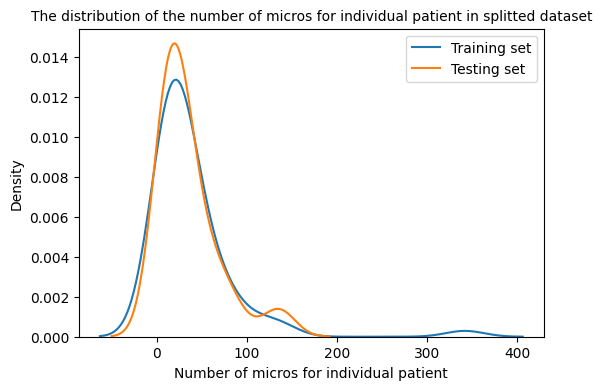

In [ ]:
plt.figure(figsize=(6, 4))
sns.kdeplot(train_values, label = "Training set")
sns.kdeplot(test_values, label = "Testing set")
plt.xlabel('Number of micros for individual patient')
plt.title("The distribution of the number of micros for individual patient in splitted dataset", fontdict= {'fontsize': 10})
plt.legend()
plt.savefig("/content/gdrive/MyDrive/TAI/splitted_micros_distribution.jpg")
plt.show()


In [ ]:
# Get the micro records by id
train_df = data.loc[data['Patient ID'].isin(train_id)]
print(train_df.shape)
test_df = data.loc[data['Patient ID'].isin(test_id)]
print(test_df.shape)

(2434, 152)
(1128, 152)


Analyze the balance of training set

The number of benign cases:  1124
The number of malignant cases:  1310


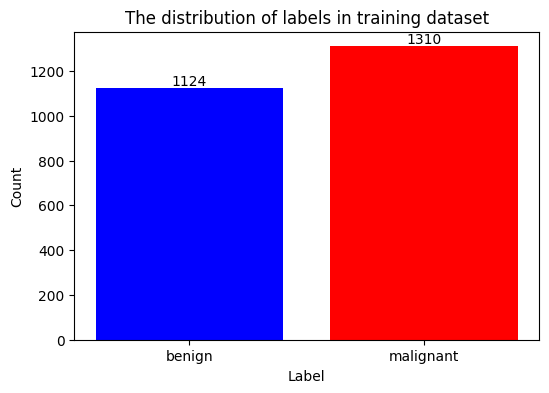

<Figure size 640x480 with 0 Axes>

In [ ]:

label_counts = train_df["Label"].value_counts()
benign_counts = label_counts[0]
malignant_counts = label_counts[1]
print("The number of benign cases: ", benign_counts)
print("The number of malignant cases: ", malignant_counts)
label = ["benign", "malignant"]
counts = [benign_counts, malignant_counts]
plt.figure(figsize=(6, 4))
colors = ['blue', 'red']
# Create a bar chart
plt.bar(label, counts, color = colors)
# Add labels and title
plt.xlabel("Label")
plt.ylabel('Count')
plt.title("The distribution of labels in training dataset")
for i in range(len(label)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')
plt.show()
plt.savefig("/content/gdrive/MyDrive/TAI/training_label_distribution.jpg")

In [ ]:
train_df.head(5)

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,1,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,1,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,...,63032.030205,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
18,2,0.920334,2.285774,0.522117,3.878066,2020.409790,1524.166434,2881.358042,463.196772,2.827840,...,17.490430,0.180535,2.530402,0.016314,0.262263,1.135335,0.909702,0.481876,20.206980,0
16,2,0.783645,2.198187,0.451967,1.929780,611.376147,481.522936,1668.899083,105.745223,0.899614,...,18.796299,0.419301,2.973633,0.001756,0.498175,1.185297,0.920319,0.910472,25.843866,0


In [ ]:
print(train_df.shape)

(2434, 152)


Save splitted datasets to files

In [ ]:
np.random.seed(42)
# shuffle the dataset
shuffled_train_df = train_df.sample(frac=1)
shuffled_test_df = test_df.sample(frac=1)
shuffled_train_df.to_csv('/content/gdrive/MyDrive/TAI/training_set.csv', index=False)
shuffled_test_df.to_csv('/content/gdrive/MyDrive/TAI/testing_set.csv', index=False)
shuffled_train_df.head(5)


,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
1222,34,0.746498,1.627599,0.308239,0.159175,15.166667,7.000000,18.333333,4.055556,0.141877,...,9.675926,0.515705,1.715728,0.284389,0.315403,1.000196,0.923905,0.916628,47.539975,0
3173,76,0.629092,2.051976,0.397052,11.477560,4194.479987,1644.024016,4341.984323,635.549639,11.357956,...,3.241028,0.075102,2.400250,0.005110,0.260886,1.329506,0.896269,0.461445,10.575639,1
1047,34,0.784976,2.777778,0.993808,0.276259,12.800000,5.800000,15.800000,2.560000,0.230895,...,20.000000,0.366232,3.422232,0.559031,0.251377,0.996453,0.928254,0.785968,25.730701,0
2015,46,0.577087,2.603525,0.710759,6.556231,2896.170217,2142.948016,3388.937854,485.392841,5.569620,...,220.845578,0.146085,3.380679,0.036039,0.370779,1.402542,0.895293,0.667424,21.795029,0
3083,75,0.830552,2.354637,0.522244,1.535882,738.784091,250.613636,1363.761364,186.534091,0.982014,...,17.550530,0.240182,2.272586,0.028931,0.472858,1.114944,0.910136,0.779987,28.225306,1
